Fast electrons - electron energy loss spectroscopy (EELS)
=========================================
*Example authors: A. Arbouet / P. R. Wiecha* (*electron* submodule by A. Arbouet)

<span style="color: red;">**!!Attention!!**:</span> The *electron* module is still beta functionality and is to be used with caution. 


In this example, we reproduce the results of EELS spectral measurements from *Campos et al.* [1].


[1]: Campos et al.: *Plasmonic Breathing and Edge Modes in Aluminum Nanotriangles* **ACS Photonics** 4(5), 1257 (2017) (https://pubs.acs.org/doi/abs/10.1021/acsphotonics.7b00204)

structure initialization - automatic mesh detection: hex
structure initialization - consistency check: 1225/1225 dipoles valid


/home/hans/.local/lib/python3.8/site-packages/pyGDM2/visu.py:49: UserWarning: 3D data. Falling back to XY projection...
  warnings.warn("3D data. Falling back to XY projection...")


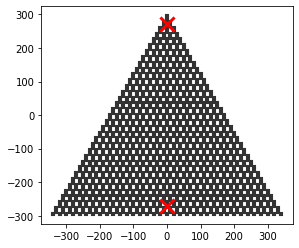

N dipoles: 1225


In [1]:
import matplotlib.pyplot as plt
import numpy as np

from pyGDM2 import structures
from pyGDM2 import materials
from pyGDM2 import fields
from pyGDM2 import core
from pyGDM2 import propagators
from pyGDM2 import electron
from pyGDM2 import tools
from pyGDM2 import visu



#****************************************************
#          SETTING PARAMETERS FOR ELECTRONS
#****************************************************
Eelec = 100.         # electron kinetic energy (keV)
kSign = 1            # Electron propagation direction
xel = 0.             # X beam position in (OXY) plane
yel =  [270, -270]   # Y beam position in (OXY) plane

#****************************************************
#         nanostructure
#****************************************************
mesh = 'hex'
step = 20

## note: set H=3 for conditions in Campos et al. ACS Photonics 4(5), Pp.1257 (2017)
geometry = structures.prism(step, NSIDE=35, H=2, mesh=mesh, ORIENTATION=1) 
geometry = structures.center_struct(geometry)
material = materials.alu()

struct = structures.struct(step, geometry, material)


#****************************************************
#         E-Field of fast electron beam
#****************************************************
energy = np.linspace(1, 3.5, 41)   # linear energy scale
wavelengths = 1239.0 / energy      # eV --> nm

## --- Defining E-field associated with fast electron beam
field_generator = fields.fast_electron
kwargs = dict(electron_kinetic_energy=Eelec, 
              x0=xel, y0=yel, kSign=kSign)

efield = fields.efield(field_generator, wavelengths=wavelengths, kwargs=kwargs)


#****************************************************
#         environment (--> used Green's tensors)
#****************************************************
n3 = 1.0  # cladding layer
n2 = 1.0  # environment
n1 = 2.0  # substrate environment
spacing = 10000.

dyads = propagators.DyadsQuasistatic123(n1, n2, n3, spacing=spacing)


#****************************************************
#         init sim
#****************************************************
sim = core.simulation(struct=struct, efield=efield, dyads=dyads)


electron.visu_structure_electron(sim)
print("N dipoles:", len(sim.struct.geometry))

run the simulation
--------------------------------

Now we run the simulation, calculating EELS spectra at the two indicated positions

In [2]:
## run the simulation
sim.scatter()

/home/hans/.local/lib/python3.8/site-packages/numba/core/dispatcher.py:237: UserWarning: Numba extension module 'numba_scipy' failed to load due to 'ValueError(No function '__pyx_fuse_0pdtr' found in __pyx_capi__ of 'scipy.special.cython_special')'.
  entrypoints.init_all()


timing for wl=1239.00nm - setup: EE 5373.4ms, inv.: 1401.2ms, repropa.: 833.5ms (2 field configs), tot: 7608.4ms
timing for wl=1166.12nm - setup: EE 2544.5ms, inv.: 3312.4ms, repropa.: 103.8ms (2 field configs), tot: 5961.7ms
timing for wl=1101.33nm - setup: EE 2573.5ms, inv.: 1415.6ms, repropa.: 95.7ms (2 field configs), tot: 4086.0ms
timing for wl=1043.37nm - setup: EE 2543.8ms, inv.: 1325.5ms, repropa.: 115.5ms (2 field configs), tot: 3985.4ms
timing for wl=991.20nm - setup: EE 2544.8ms, inv.: 1429.1ms, repropa.: 87.5ms (2 field configs), tot: 4062.4ms
timing for wl=944.00nm - setup: EE 2538.1ms, inv.: 1207.3ms, repropa.: 89.8ms (2 field configs), tot: 3835.8ms
timing for wl=901.09nm - setup: EE 2549.9ms, inv.: 1231.2ms, repropa.: 104.4ms (2 field configs), tot: 3886.3ms
timing for wl=861.91nm - setup: EE 2558.9ms, inv.: 1170.8ms, repropa.: 92.0ms (2 field configs), tot: 3822.7ms
timing for wl=826.00nm - setup: EE 2542.0ms, inv.: 1215.1ms, repropa.: 91.4ms (2 field configs), tot: 38

1

Plot the EELS spectra
--------------------------------

Comparison with the reference gives a very good agreement

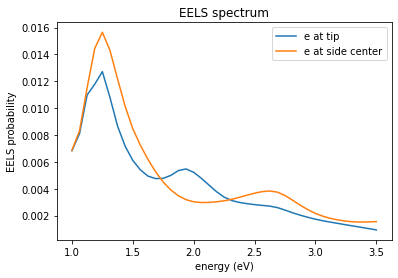

In [3]:
#%% EELS spectra
## prism tip
wl, EELS_spec_tip = tools.calculate_spectrum(sim, 0, electron.EELS)
## side center
wl, EELS_spec_side = tools.calculate_spectrum(sim, 1, electron.EELS)

plt.title("EELS spectrum")
plt.plot(energy, EELS_spec_tip, label='e at tip')
plt.plot(energy, EELS_spec_side, label='e at side center')
plt.legend()
plt.xlabel("energy (eV)")
plt.ylabel("EELS probability")
plt.show()

Plot cathodoluminescence (CL) spectra
--------------------------------

Cathodoluminescence can be calculated as well

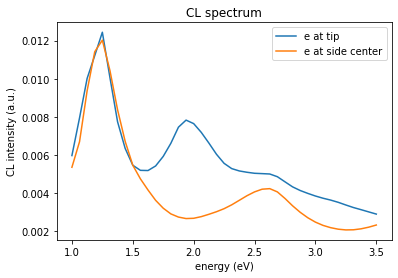

In [4]:
## prism tip
wl, CL_spec_tip = tools.calculate_spectrum(sim, 0, electron.CL)
## prism bottom center
wl, CL_spec_side = tools.calculate_spectrum(sim, 1, electron.CL)

plt.title("CL spectrum")
plt.plot(energy, CL_spec_tip, label='e at tip')
plt.plot(energy, CL_spec_side, label='e at side center')
plt.legend()
plt.xlabel("energy (eV)")
plt.ylabel("CL intensity (a.u.)")
plt.show()